# TASK 1 : EDA on Global Terrorism

Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

As a security/defense analyst, try to find out the hot zone of terrorism.

What all security issues and insights you can derive by EDA?

GRIP Task

-Satyam Singh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [3]:
terr_df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin-1')
terr_df.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:

terr_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
#dimensions of the dataset
terr_df.shape

(181691, 135)

In [6]:
terr_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
terr_df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                        'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                        'nkill':'Killed','targtype1_txt':'Target_type','nwound':'Wounded','summary':'Summary','gname':'Group',
                        'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude',
                        'longitude':'Longitude'},inplace=True)

In [8]:
terr_df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
terr_df=terr_df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','AttackType',
           'Killed','Wounded','Target','Summary','Group','Weapon_type','Motive']]

In [10]:
terr_df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Incendiary,NaN


In [11]:
terr_df.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [12]:

terr_df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Incendiary,NaN


([<matplotlib.axis.XTick at 0x21b0c0dd188>,
 <a list of 11 Text xticklabel objects>)

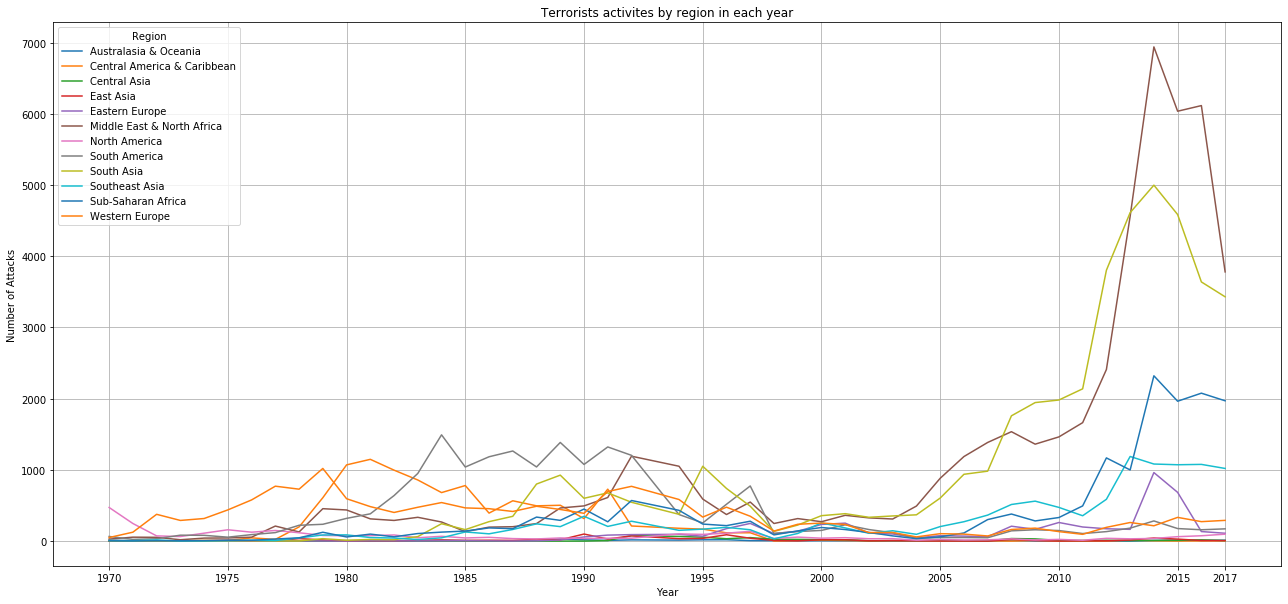

In [22]:
#Terrorist Activities by Region in each year
pd.crosstab(terr_df['Year'],terr_df['Region']).plot(kind='line',figsize=(22,10))
plt.title('Terrorists activites by region in each year')
plt.ylabel("Number of Attacks")
plt.grid()
plt.xticks([1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2017])

CONCLUSION:
There has been a huge spike since 2000 especially in Middle East & North Africa Region,South Asia and Australasia and Oceania

In [23]:
#Lets see the most affected regions closely!!
terr_df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

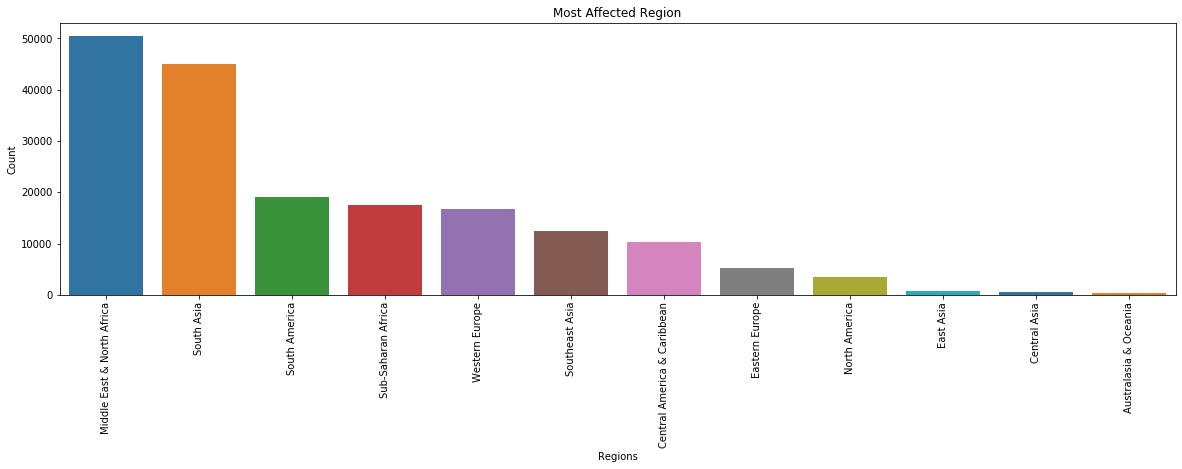

In [28]:
#we shall visualize it using a bar graph so that we can make comparisons easily
plt.figure(figsize=(20,5))
sns.barplot(terr_df['Region'].value_counts()[:15].index,terr_df['Region'].value_counts()[:15].values,palette='tab10')
plt.title("Most Affected Region")
plt.xlabel("Regions")
plt.ylabel("Count")
plt.xticks(rotation=90)

We can infer that Middle East & North Africa, South Asia are greatly affected by terror groups as compared to the rest of the world.

In [29]:
terr_df['Country'].value_counts().head(15)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

Lets compare the Countries with each other similar to Regions

Text(0, 0.5, 'Counts')

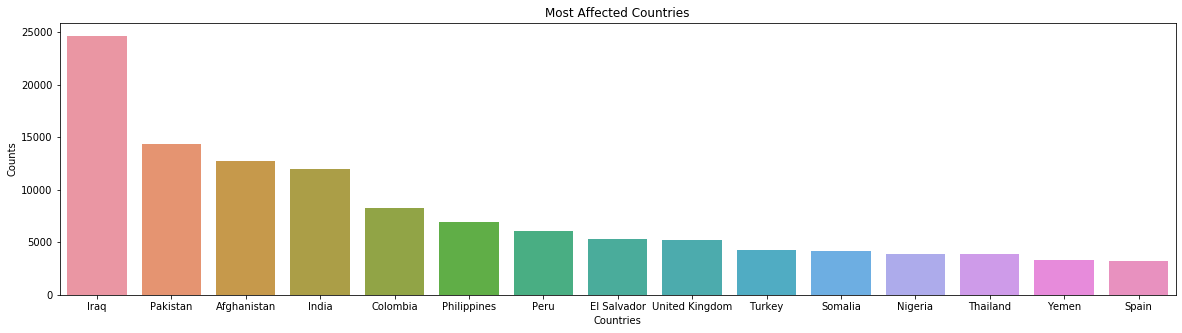

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(terr_df['Country'].value_counts()[:15].index,terr_df['Country'].value_counts()[:15].values)
plt.title('Most Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Counts')

`Conclusion:
||Iraq is the most affected country.||
||Among the top 10 most affected countries ,5 are asian.||
||From the top 5 countries , 4 are asian.||

Now,Lets see the top 10 most affected states in the world.

In [34]:
terr_df['State'].value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

Now lets see country wise states affected.

In [41]:
df_indsts=terr_df[terr_df['Country']=='India']['State']
df_indsts.value_counts()[:10]

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Name: State, dtype: int64

In India,Jammu and Kashmir are the most affected followed by assam.`

Text(0, 0.5, 'count')

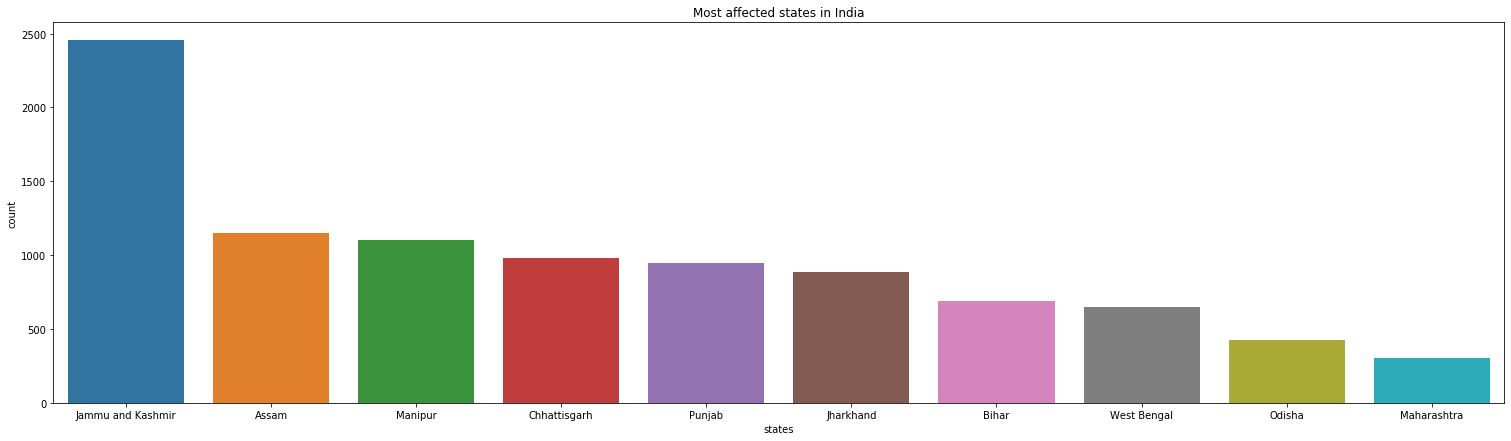

In [43]:
plt.figure(figsize=(26,7))
sns.barplot(df_indsts.value_counts()[:10].index,df_indsts.value_counts()[:10].values)
plt.title("Most affected states in India")
plt.xlabel("states")
plt.ylabel("count")

Now we should focus on the type of attcks

In [58]:
terr_df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

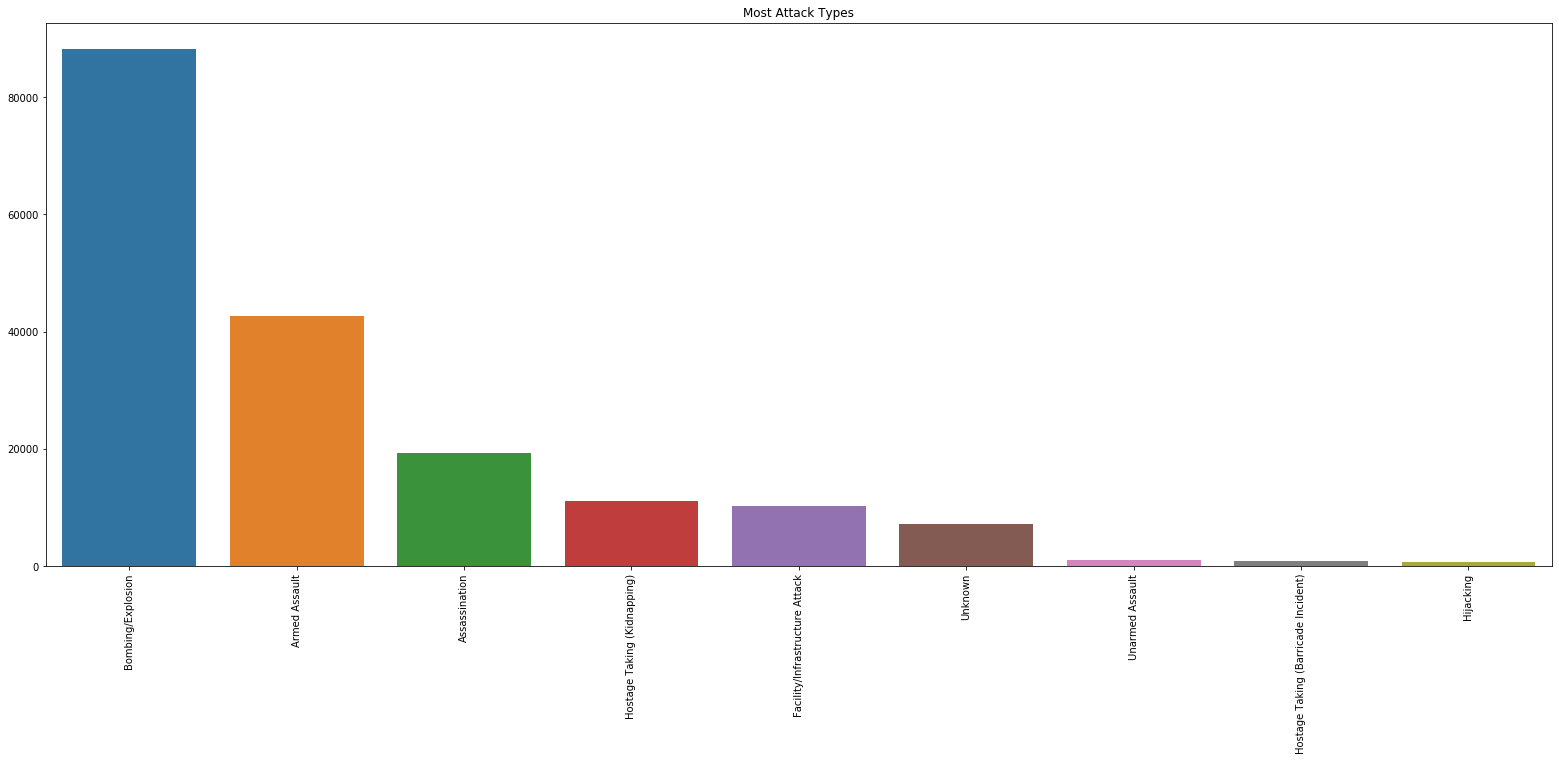

In [64]:
plt.figure(figsize=(27,10))
sns.barplot(terr_df['AttackType'].value_counts()[:15].index,terr_df['AttackType'].value_counts()[:15].values)
plt.xticks(rotation=90)
plt.title('Most Attack Types')
plt.show()

Almost 50% of the attacks are done by Bombing and Explosion

Now, Lets see who should stay the safest or who is attcked the most

In [66]:
terr_df['Target'].value_counts()[:10]

Civilians        6461
Unknown          5918
Soldiers         3157
Patrol           2942
Checkpoint       2905
Vehicle          2785
Officers         1787
Village          1679
Military Unit    1533
Bus              1335
Name: Target, dtype: int64

Harmless civilians are the main targets.

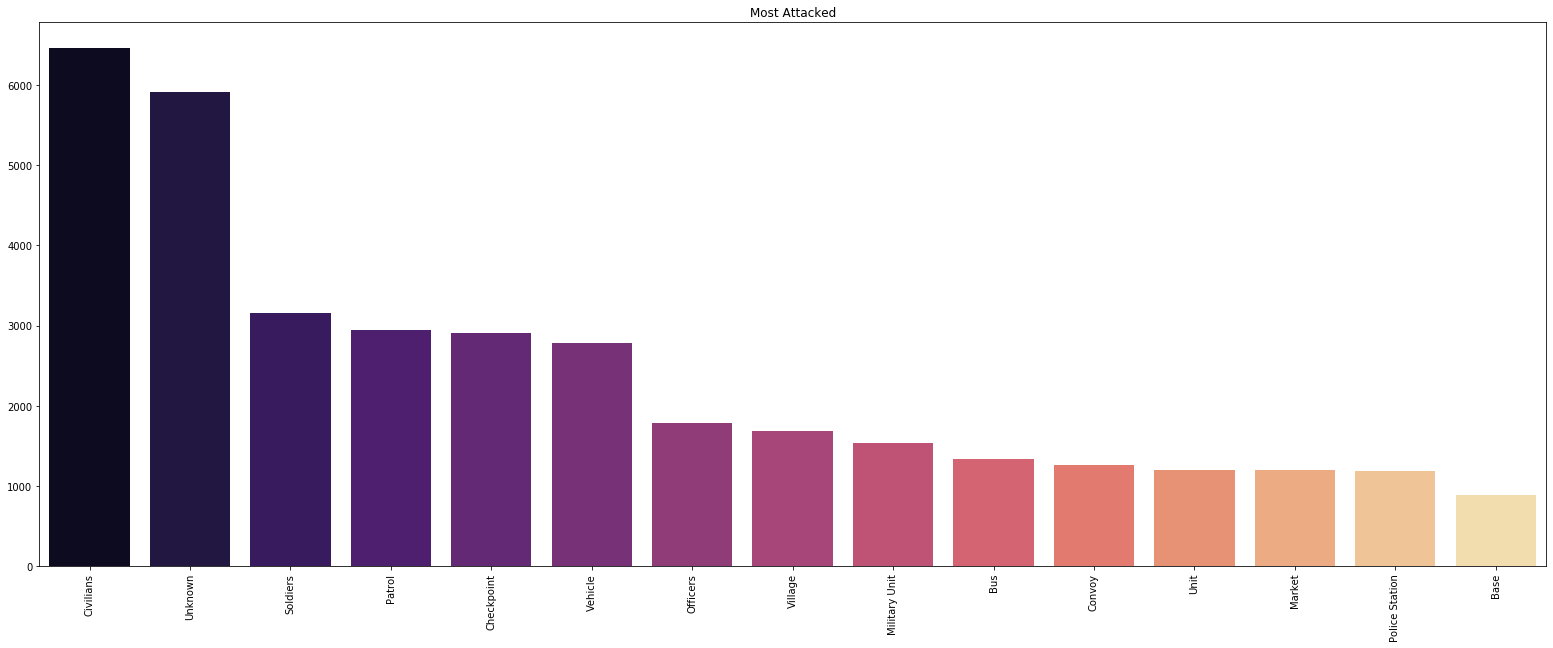

In [70]:
plt.figure(figsize=(27,10))
sns.barplot(terr_df['Target'].value_counts()[:15].index,terr_df['Target'].value_counts()[:15].values,palette="magma")
plt.xticks(rotation=90)
plt.title('Most Attacked')
plt.show()

In [75]:
terr_df['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

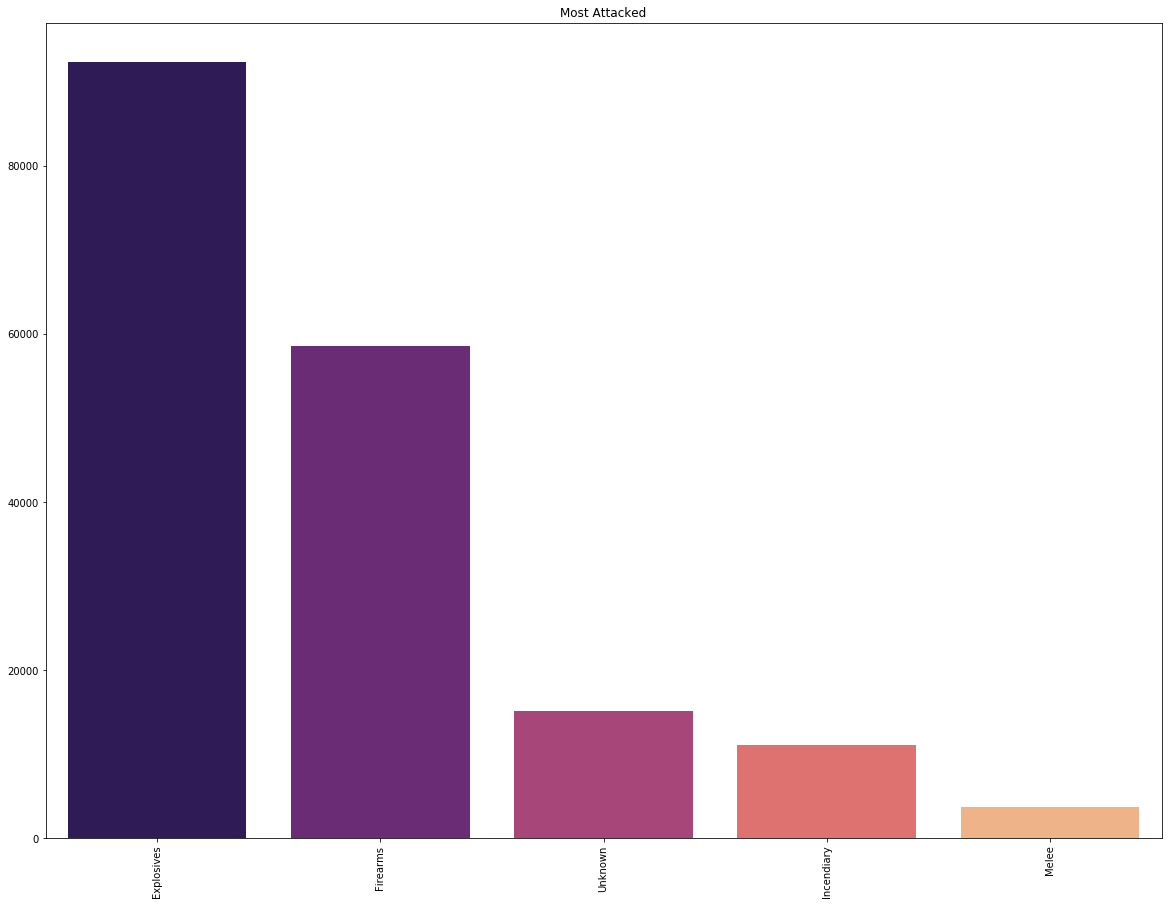

In [79]:
plt.figure(figsize=(20,15))
sns.barplot(terr_df['Weapon_type'].value_counts()[:5].index,terr_df['Weapon_type'].value_counts()[:5].values,palette="magma")
plt.xticks(rotation=90)
plt.title('Most Attacked')
plt.show()

Firearms and Explosives are the most lethal and used weapon by terrorists

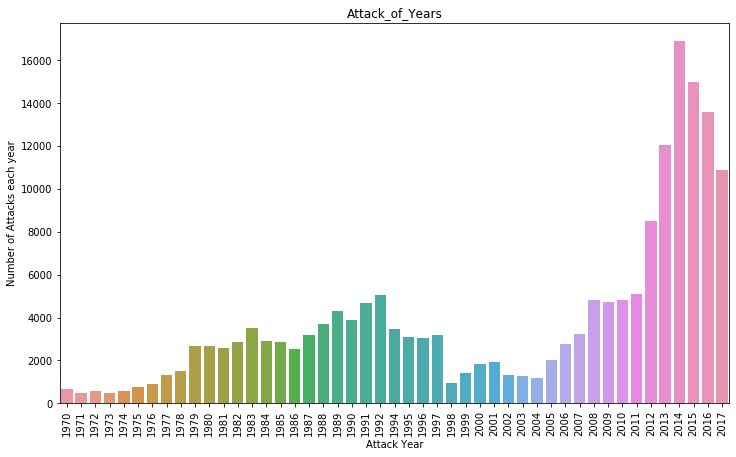

In [81]:

x_year = terr_df['Year'].unique()
y_count_years = terr_df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,7))
sns.barplot(x = x_year,
           y = y_count_years)
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

We can see an increase in number of attacks from 2000 and reaches a peak in 2014.

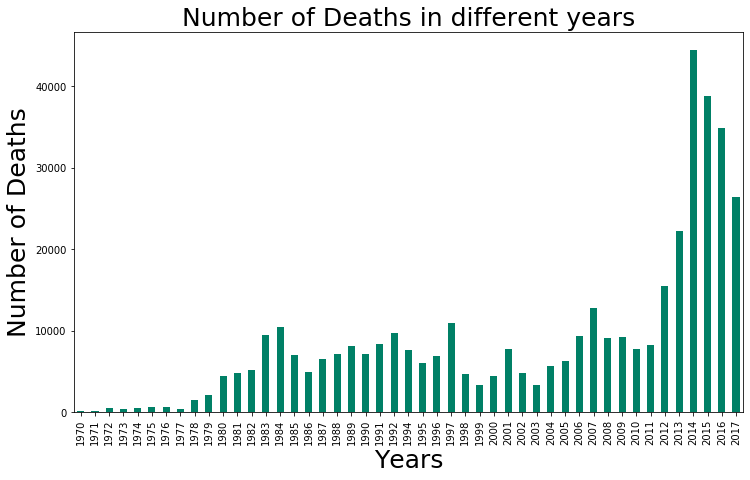

In [84]:
plt.figure(figsize = (12,7))
terr_df.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()


We can see a minimum of 20000 deaths from 2014 which is shocking!!

Lets see the Region wise wounded and Killed

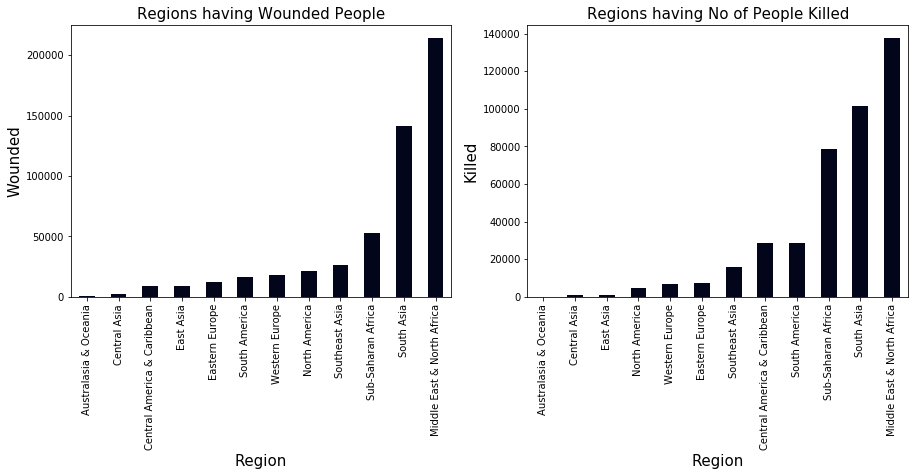

In [87]:
plt.subplot(1,2,1)
terr_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending=True).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df.groupby(['Region'])['Killed'].sum().sort_values(ascending=True).plot(kind='bar',colormap='rocket')
plt.title('Regions having No of People Killed',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,5)

Middle East & North Africa have more than 2L wounded and killed


Now, Lets see the Terrorist Organizations around the world.

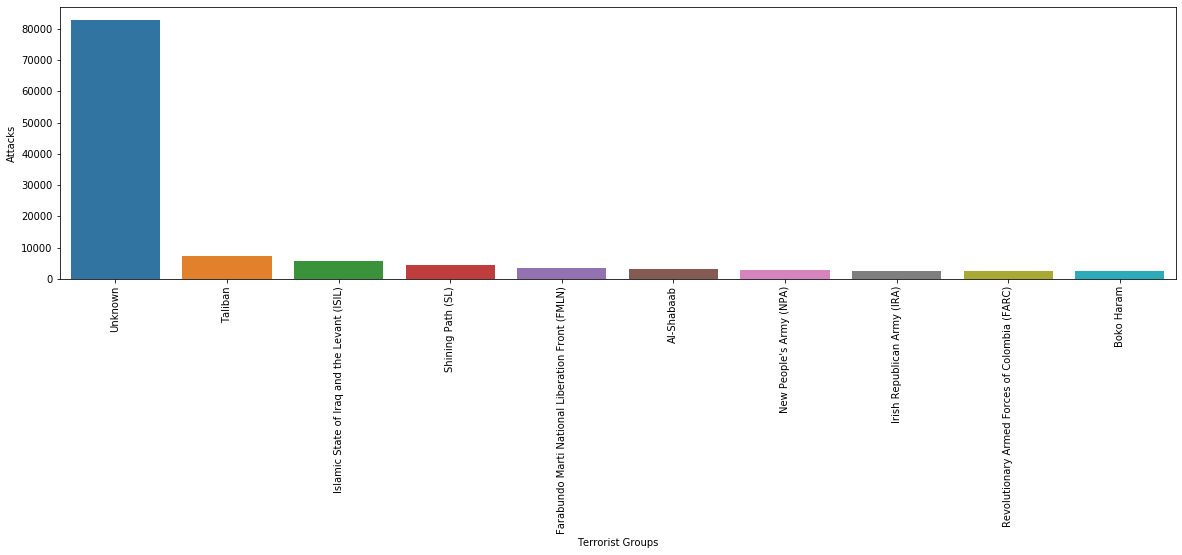

In [91]:
plt.figure(figsize=(20,5))
sns.barplot(terr_df['Group'].value_counts()[:10].index,terr_df['Group'].value_counts()[:10].values)
plt.xlabel('Terrorist Groups')
plt.ylabel('Attacks')
plt.xticks(rotation=90)
plt.show()

Lets investigate the terror attacks by taliban

In [104]:
terr_df_tal = terr_df[terr_df['Group']=='Taliban']

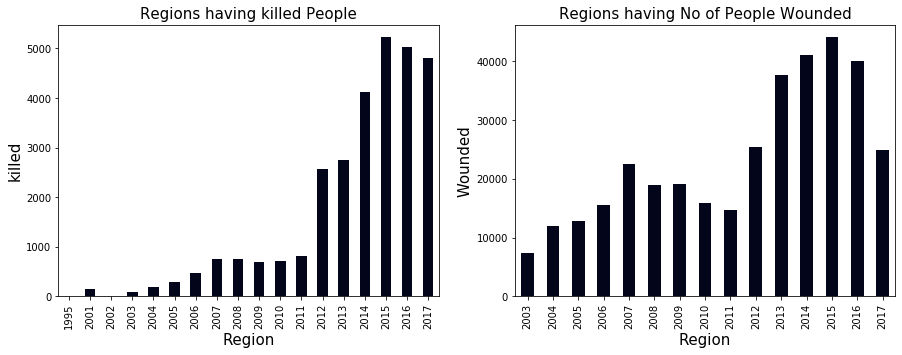

In [103]:
plt.subplot(1,2,1)
terr_df_tal.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='rocket')
plt.title('Regions having killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('killed',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df.groupby(['Year'])['Wounded'].sum()[-15:].plot(kind='bar',colormap='rocket')
plt.title('Regions having No of People Wounded',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Wounded',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,5)

# CONCLUSION
After performing the Exploratory Data Analysis we get the following insights from the data:

Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.

Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.

In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.

The most common attack type was Bombing/Explosion.

Taliban became more active since 2012 and they are responsible for the most of the terror attacks

Explosives have been consistently the most popular weapon of choice for terrorists.
